In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import jaccard_score
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
import os
path = os.listdir(r'C://Users//Hitesh//Desktop//5 TH SEMESTER//DIGITAL IMAGE PROCESSING//DATASET//Training')
classes  = {'glioma_tumor':0,'no_tumor':1}

In [3]:
import cv2
X, Y = [], []
for cls in classes:
    pth =r'C://Users//Hitesh//Desktop//5 TH SEMESTER//DIGITAL IMAGE PROCESSING//DATASET//Training//'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
np.unique(Y)

array([0, 1])

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
pd.Series(Y).value_counts()

0    826
1    395
Name: count, dtype: int64

In [7]:
X.shape

(1221, 200, 200)

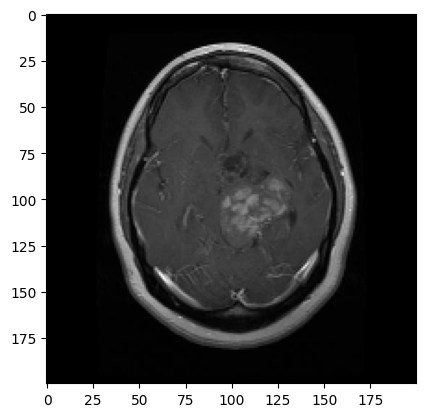

In [8]:
plt.imshow(X[0], cmap='gray')

In [9]:
X_updated = X.reshape(len(X),-1)
X_updated.shape

(1221, 40000)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((976, 40000), (245, 40000))

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
from sklearn.decomposition import PCA

In [14]:
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)

(976, 40000) (245, 40000)


In [15]:
pca_test.shape, pca_train.shape

((245, 604), (976, 604))

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [17]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [18]:
print("Training Score: ", lg.score(pca_train, ytrain))
print("testing Score: ", lg.score(pca_test, ytest))

Training Score:  1.0
testing Score:  0.9591836734693877


In [19]:
print("Training Score: ", sv.score(pca_train, ytrain))
print("testing Score: ", sv.score(pca_test, ytest))

Training Score:  0.985655737704918
testing Score:  0.9591836734693877


In [20]:
pca_test.shape

(245, 604)

In [21]:
pred = sv.predict(pca_test)
np.where(ytest != pred)

(array([ 58,  86, 100, 103, 116, 133, 136, 209, 211, 214], dtype=int64),)

In [22]:
pred[6]

0

In [23]:
ytest[6]

0

In [24]:
dec = {0: 'No tumour', 1: 'tumor'}

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

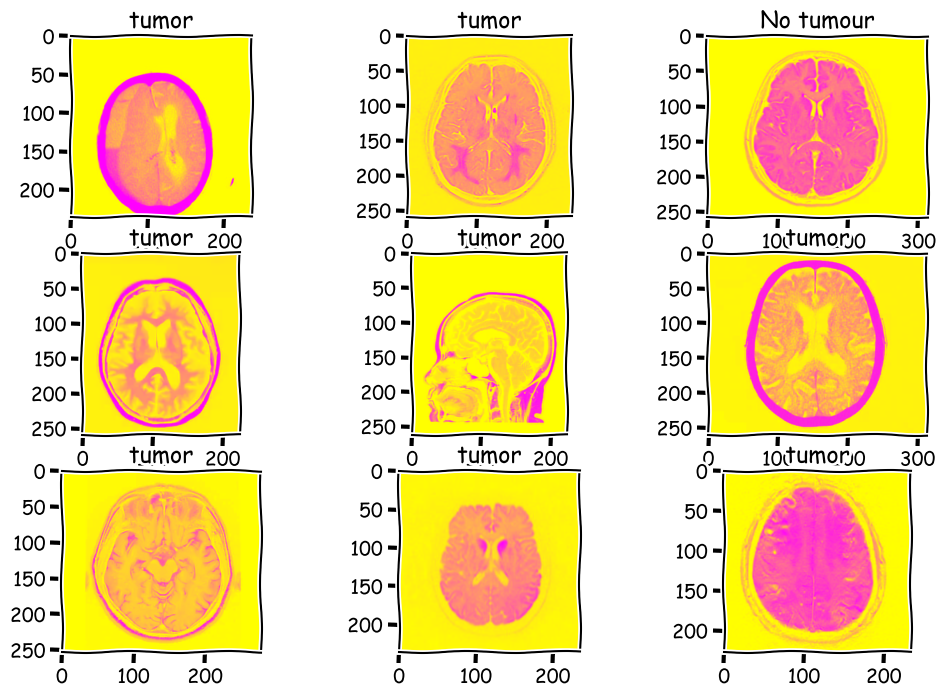

In [25]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Hitesh\Desktop\5 TH SEMESTER\DIGITAL IMAGE PROCESSING\DATASET\Testing')
c=1
with plt.xkcd():

    for i in os.listdir('C://Users//Hitesh//Desktop//5 TH SEMESTER\DIGITAL IMAGE PROCESSING//DATASET//Testing//no_tumor')[:9]:
        plt.subplot(3,3,c)

        img = cv2.imread('C://Users//Hitesh//Desktop//5 TH SEMESTER\DIGITAL IMAGE PROCESSING//DATASET//Testing//no_tumor//' + i, 0)
        img1 = cv2.resize(img, (200,200))
        img1 = img1.reshape(1,-1)/255
        pca_test = pca.transform(img1)
        p = sv.predict(pca_test)
        plt.title(dec[p[0]])
        plt.imshow(img, cmap='spring_r')
        c+=1

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

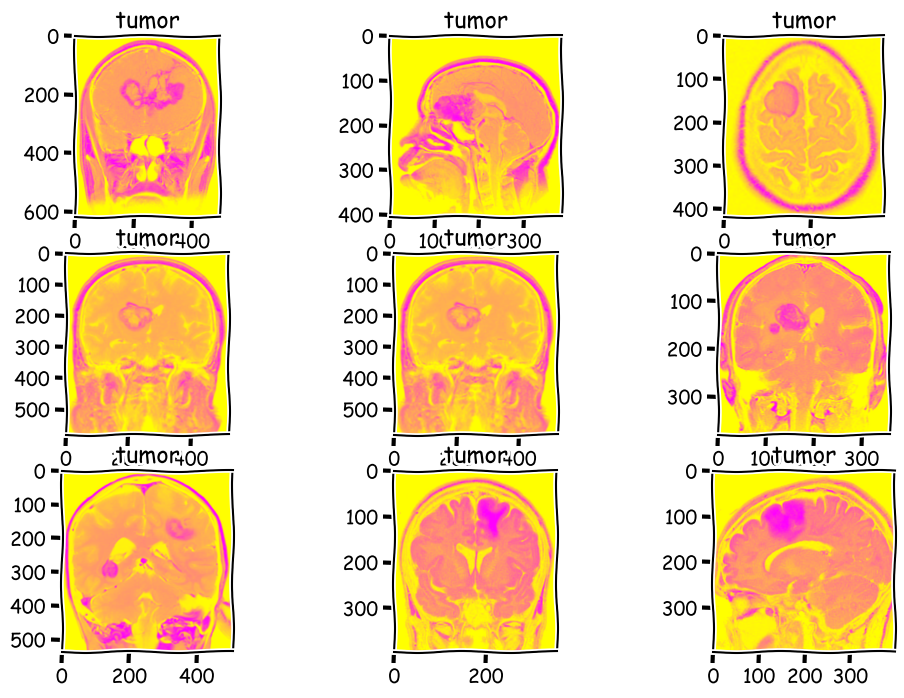

In [26]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C://Users//Hitesh//Desktop//5 TH SEMESTER//DIGITAL IMAGE PROCESSING//DATASET//Testing')
c=1
with plt.xkcd():

    for i in os.listdir(r'C://Users//Hitesh//Desktop//5 TH SEMESTER//DIGITAL IMAGE PROCESSING//DATASET//Testing//glioma_tumor')[:9]:
        plt.subplot(3,3,c)

        img = cv2.imread(r'C://Users//Hitesh//Desktop//5 TH SEMESTER//DIGITAL IMAGE PROCESSING//DATASET//Testing//glioma_tumor//' + i, 0)
#         print(img.shape)
        img1 = cv2.resize(img, (200,200))
#         print(img1.shape)
        img1 = (img1.reshape(1,-1))/255
        pca_test = pca.transform(img1)
#         print(pca_test.shape)
        p = sv.predict(pca_test)
        plt.title(dec[p[0]])
        plt.imshow(img, cmap='spring_r')
        c+=1

# RANDOM FOREST 

In [27]:
X_train,X_test,y_train,y_test=train_test_split(pca_train,ytrain,test_size=0.1,random_state=1)

In [28]:
rfmodel=RandomForestClassifier(n_estimators=600)

In [29]:
rfmodel.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [30]:
y_pred=rfmodel.predict(X_test)

In [31]:
print('accuracy_score: ',accuracy_score(y_test,y_pred))
print('recall_score: ',recall_score(y_test,y_pred))
print('jaccard_score: ',jaccard_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred))
print('precision_score: ',precision_score(y_test,y_pred))

accuracy_score:  0.9591836734693877
recall_score:  0.9090909090909091
jaccard_score:  0.8823529411764706
f1_score:  0.9374999999999999
precision_score:  0.967741935483871


# SVM WITH KERNELS 

In [32]:
# With rbf Kernel
svcmodel=SVC(kernel='rbf',C=10)
svcmodel.fit(X_train,y_train)
y_pred_scv=svcmodel.predict(X_test)
print('accuracy_score: ',accuracy_score(y_test,y_pred_scv))
print('recall_score: ',recall_score(y_test,y_pred_scv))
print('jaccard_score: ',jaccard_score(y_test,y_pred_scv))
print('f1_score: ',f1_score(y_test,y_pred_scv))
print('precision_score: ',precision_score(y_test,y_pred_scv))

fig = px.imshow(np.around(confusion_matrix(y_test, y_pred_scv, normalize='true'),2), 
                template='ggplot2',
                text_auto=True, 
                aspect="True", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

accuracy_score:  0.9693877551020408
recall_score:  0.9393939393939394
jaccard_score:  0.9117647058823529
f1_score:  0.9538461538461539
precision_score:  0.96875


In [33]:
# With linear Kernel

svcmodel=SVC(kernel='linear')
svcmodel.fit(X_train,y_train)
y_pred_scv=svcmodel.predict(X_test)
print('accuracy_score: ',accuracy_score(y_test,y_pred_scv))
print('recall_score: ',recall_score(y_test,y_pred_scv))
print('jaccard_score: ',jaccard_score(y_test,y_pred_scv))
print('f1_score: ',f1_score(y_test,y_pred_scv))
print('precision_score: ',precision_score(y_test,y_pred_scv))

fig = px.imshow(np.around(confusion_matrix(y_test, y_pred_scv, normalize='true'),2), 
                template='ggplot2',
                text_auto=True, 
                aspect="True", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

accuracy_score:  0.9795918367346939
recall_score:  0.9393939393939394
jaccard_score:  0.9393939393939394
f1_score:  0.96875
precision_score:  1.0


In [34]:
# With poly Kernel


svcmodel=SVC(kernel='poly',degree=2,C=10)
svcmodel.fit(X_train,y_train)
y_pred_scv=svcmodel.predict(X_test)
print('accuracy_score: ',accuracy_score(y_test,y_pred_scv))
print('recall_score: ',recall_score(y_test,y_pred_scv))
print('jaccard_score: ',jaccard_score(y_test,y_pred_scv))
print('f1_score: ',f1_score(y_test,y_pred_scv))
print('precision_score: ',precision_score(y_test,y_pred_scv))

fig = px.imshow(np.around(confusion_matrix(y_test, y_pred_scv, normalize='true'),2), 
                template='ggplot2',
                text_auto=True, 
                aspect="True", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

accuracy_score:  0.9387755102040817
recall_score:  0.8181818181818182
jaccard_score:  0.8181818181818182
f1_score:  0.9
precision_score:  1.0


In [35]:
# With sigmoid Kernel


svcmodel=SVC(kernel='sigmoid')
svcmodel.fit(X_train,y_train)
y_pred_scv=svcmodel.predict(X_test)
print('accuracy_score: ',accuracy_score(y_test,y_pred_scv))
print('recall_score: ',recall_score(y_test,y_pred_scv))
print('jaccard_score: ',jaccard_score(y_test,y_pred_scv))
print('f1_score: ',f1_score(y_test,y_pred_scv))
print('precision_score: ',precision_score(y_test,y_pred_scv))

fig = px.imshow(np.around(confusion_matrix(y_test, y_pred_scv, normalize='true'),2), 
                template='ggplot2',
                text_auto=True, 
                aspect="True", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

accuracy_score:  0.8571428571428571
recall_score:  0.696969696969697
jaccard_score:  0.6216216216216216
f1_score:  0.7666666666666667
precision_score:  0.8518518518518519


SVM Kernel		Accuracy
---------------------------
linear			0.9693877551020408
poly			0.9795918367346939
rbf			0.9387755102040817
sigmoid			0.8571428571428571


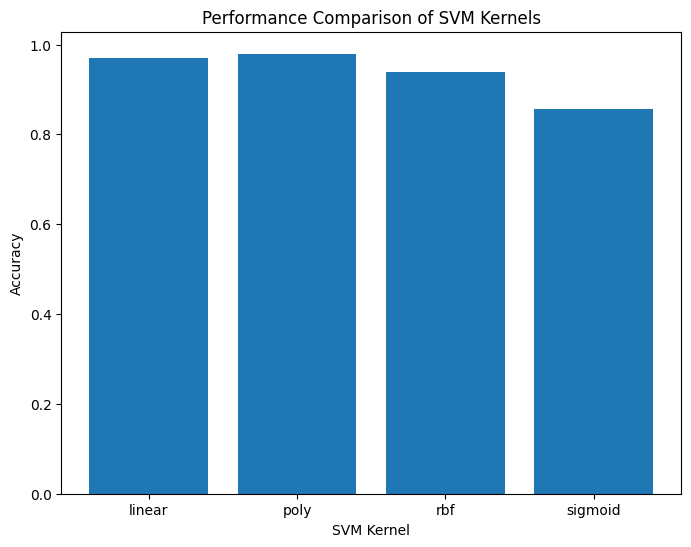

In [36]:
# Define the SVM kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Train and evaluate SVMs for each kernel
accuracies = []
for kernel in kernels:
    svcmodel_rbf=SVC(kernel='rbf',C=10)
    svcmodel_rbf.fit(X_train,y_train)
    svcmodel_linear=SVC(kernel='linear')
    svcmodel_linear.fit(X_train,y_train)
    svcmodel_poly=SVC(kernel='poly',degree=2,C=10)
    svcmodel_poly.fit(X_train,y_train)
    svcmodel_sigmoid=SVC(kernel='sigmoid')
    svcmodel_sigmoid.fit(X_train,y_train)

    # Predict the labels for test data
    y_pred_rbf=svcmodel_rbf.predict(X_test)
    y_pred_linear=svcmodel_linear.predict(X_test)
    y_pred_poly=svcmodel_poly.predict(X_test)
    y_pred_sigmoid=svcmodel_sigmoid.predict(X_test)
    
    # Calculate accuracy score
    accuracy1 = accuracy_score(y_test, y_pred_rbf)
    accuracy2 = accuracy_score(y_test, y_pred_linear)
    accuracy3 = accuracy_score(y_test, y_pred_poly)
    accuracy4 = accuracy_score(y_test, y_pred_sigmoid)
    accuracies=[accuracy1,accuracy2,accuracy3,accuracy4]

# Display the results in a tabular column
print("SVM Kernel\t\tAccuracy")
print("---------------------------")
for i in range(len(kernels)):
    print(f"{kernels[i]}\t\t\t{accuracies[i]}")

# Plot the performance comparison
plt.figure(figsize=(8, 6))
plt.bar(kernels, accuracies)
plt.xlabel("SVM Kernel")
plt.ylabel("Accuracy")
plt.title("Performance Comparison of SVM Kernels")
plt.show()
